In [1]:
import os, csv
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
%matplotlib inline

In [2]:
gitcommand = ['git', 'fetch']
nation = 'US'
series = 'Confirmed'

In [3]:
covid19_dir = os.path.join(
    os.environ['HOME'],
    'Covid-19',
    'COVID-19'
)
ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    'time_series_19-covid-{series}.csv'.format(series=series)    
)
[
    covid19_dir,
    ts_file
]

['/home/leon/Covid-19/COVID-19',
 '/home/leon/Covid-19/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv']

In [4]:
os.curdir = covid19_dir
subprocess.run(gitcommand)

CompletedProcess(args=['git', 'fetch'], returncode=128)

In [5]:
with open(ts_file, 'r') as csvfile:
    tsreader = csv.DictReader(csvfile)
    ts_data = list(tsreader)

In [6]:
ts_frame = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
ts_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
list(ts_frame.loc[:,'Country/Region'])

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Australia',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Australia',
 'Belgium',
 'Egypt',
 'Australia',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Australia',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Australia',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Australia',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzeg

In [8]:
nationrows = ts_frame.loc[:, 'Country/Region'] == nation
nationrows

0      False
1      False
2      False
3      False
4      False
       ...  
437    False
438    False
439    False
440     True
441    False
Name: Country/Region, Length: 442, dtype: bool

In [9]:
nation_frame = ts_frame[nationrows]
nation_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
100,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,0,0,0,267,366,442,568,572
101,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,0,0,0,173,220,328,421,525
102,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,0,0,0,144,177,221,282,340
103,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,0,0,0,92,95,108,123,138
104,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,45,45,45,45,46,46,46,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,"Wayne, MI",US,42.2791,-83.3362,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,6
424,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [10]:
nation_frame.aggregate(np.sum)

Province/State    WashingtonNew YorkCaliforniaMassachusettsDiamo...
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Lat                                                         9517.56
Long                                                       -23096.6
1/22/20                                                           1
1/23/20                                                           1
1/24/20                                                           2
1/25/20                                                           2
1/26/20                                                           5
1/27/20                                                           5
1/28/20                                                           5
1/29/20                                                           5
1/30/20                                                           5
1/31/20                                                           7
2/1/20                                          

In [11]:
nation_series = nation_frame.agg(np.sum)[4:]
[
    type(nation_series),
    nation_series
]

[pandas.core.series.Series,
 1/22/20       1
 1/23/20       1
 1/24/20       2
 1/25/20       2
 1/26/20       5
 1/27/20       5
 1/28/20       5
 1/29/20       5
 1/30/20       5
 1/31/20       7
 2/1/20        8
 2/2/20        8
 2/3/20       11
 2/4/20       11
 2/5/20       11
 2/6/20       11
 2/7/20       11
 2/8/20       11
 2/9/20       11
 2/10/20      11
 2/11/20      12
 2/12/20      12
 2/13/20      13
 2/14/20      13
 2/15/20      13
 2/16/20      13
 2/17/20      13
 2/18/20      13
 2/19/20      13
 2/20/20      13
 2/21/20      15
 2/22/20      15
 2/23/20      15
 2/24/20      51
 2/25/20      51
 2/26/20      57
 2/27/20      58
 2/28/20      60
 2/29/20      68
 3/1/20       74
 3/2/20       98
 3/3/20      118
 3/4/20      149
 3/5/20      217
 3/6/20      262
 3/7/20      402
 3/8/20      518
 3/9/20      583
 3/10/20     959
 3/11/20    1281
 3/12/20    1663
 3/13/20    2179
 3/14/20    2727
 dtype: object]

In [12]:
strdates = nation_series.keys()
dates = [pd.to_datetime(sd) for sd in strdates]
[
    type(strdates),
    strdates,
    type(dates),
    dates,
    np.array(nation_series[:])
]

[pandas.core.indexes.base.Index,
 Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
        '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
        '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
        '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
        '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
        '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
        '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
        '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
        '3/13/20', '3/14/20'],
       dtype='object'),
 list,
 [Timestamp('2020-01-22 00:00:00'),
  Timestamp('2020-01-23 00:00:00'),
  Timestamp('2020-01-24 00:00:00'),
  Timestamp('2020-01-25 00:00:00'),
  Timestamp('2020-01-26 00:00:00'),
  Timestamp('2020-01-27 00:00:00'),
  Timestamp('2020-01-28 00:00:00'),
  Timestamp('2020-01-29 00:00:00'),
  Timestam

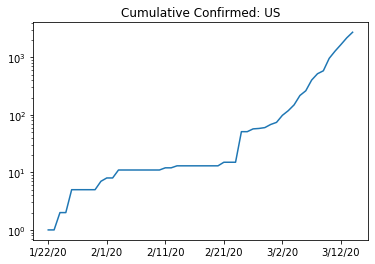

In [13]:
nation_series.plot(
    logy=True, 
    title='Cumulative {series}: {nation}'.format(series=series, nation=nation)
)